# Task-1

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')
print(df.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')


In [3]:
print(df.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

# Task-2

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace missing values (-200) with NaN for the selected feature
df['C6H6(GT)'] = df['C6H6(GT)'].replace(-200, float('nan')).dropna()

# Central tendency & dispersion
mean_value = df['C6H6(GT)'].mean()
median_value = df['C6H6(GT)'].median()
mode_value = df['C6H6(GT)'].mode()
std_value = df['C6H6(GT)'].std()
var_value = df['C6H6(GT)'].var()
range_value = df['C6H6(GT)'].max()-df['C6H6(GT)'].min()

# Print the computed measures
print(f"Mean: {mean_value}, Median: {median_value},Mode: {mode_value}, Std Deviation: {std_value}, Variance: {var_value}, Range: {range_value}")


Mean: 10.082993455078688, Median: 8.239851353044795,Mode: 0    6.849892
Name: C6H6(GT), dtype: float64, Std Deviation: 7.449639864092476, Variance: 55.497134104675766, Range: 63.59242870945786


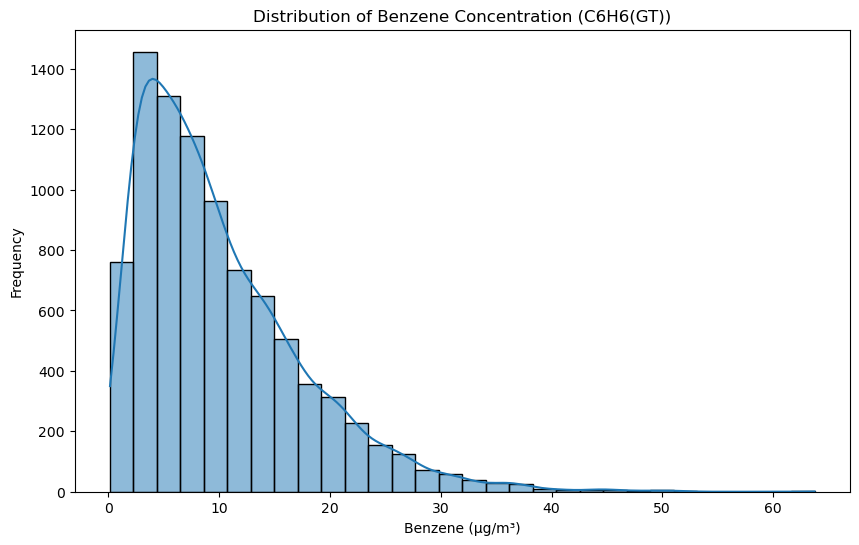

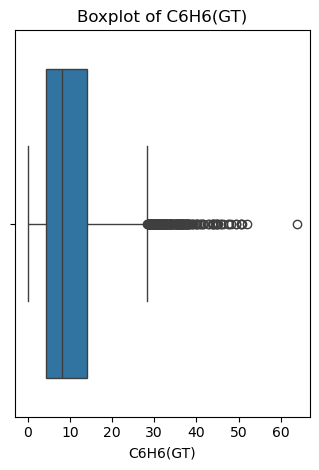

In [9]:
# Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['C6H6(GT)'], bins=30, kde=True)
plt.title('Distribution of Benzene Concentration (C6H6(GT))')
plt.xlabel('Benzene (µg/m³)')
plt.ylabel('Frequency')
plt.show()

# Box plot 
plt.subplot(1,2,1)
sns.boxplot(x=df['C6H6(GT)'])
plt.title('Boxplot of C6H6(GT)')
plt.xlabel('C6H6(GT)')

plt.tight_layout()
plt.show()

# Task -3


In [12]:
from sklearn.preprocessing import MinMaxScaler

print("Selected attribute value: T ( Temperature)",)
print()

# Select Temperature attribute
temperature = df['T'].dropna().values.reshape(-1, 1)

# Normalize using Min-Max Scaling
scaler = MinMaxScaler()
normalized_temperature = scaler.fit_transform(temperature)

# Convert to DataFrame for easier handling
df_normalized = pd.DataFrame(normalized_temperature, columns=['Normalized Temperature'])

# Print results
print(df_normalized.head())


Selected attribute value: T ( Temperature)

   Normalized Temperature
0                0.873262
1                0.872036
2                0.866312
3                0.862633
4                0.863246


# Task - 4

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample 20 data objects
sampled_df = df.sample(n=20).dropna()

# Compute pairwise similarity using cosine similarity
similarity_matrix = cosine_similarity(sampled_df[['NO2(GT)', 'CO(GT)', 'T']].values)

# Find pair with maximum similarity
np.fill_diagonal(similarity_matrix, 0)  # Ignore self-similarity
max_sim_index = np.unravel_index(np.argmax(similarity_matrix), similarity_matrix.shape)
max_sim_score = similarity_matrix[max_sim_index]

# Print results
print(f"Maximum Similarity Score: {max_sim_score:.2f}")
print(f"Pairs with Maximum Similarity: {max_sim_index}")
print(f"Are they really similar? {'Yes' if max_sim_score > 0.8 else 'No'}")


Maximum Similarity Score: 1.00
Pairs with Maximum Similarity: (4, 16)
Are they really similar? Yes


# Task-5

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select numerical columns for PCA
numerical_data = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                     'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                     'T', 'RH', 'AH']]

# Normalize the data
scaler = MinMaxScaler()
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 dimensions
numerical_data_pca = pca.fit_transform(numerical_data_normalized)

# Sample 20 random data objects from PCA-reduced data
sample_pca_df = pd.DataFrame(numerical_data_pca).sample(n=20, random_state=42)

# Compute pairwise Euclidean distances on PCA-reduced data
distances_pca = euclidean_distances(sample_pca_df)

# Convert distances to similarity scores
similarity_scores_pca = 1 / (1 + distances_pca)  # Adding 1 to avoid division by zero

# Find the pair with maximum similarity in PCA-reduced data
np.fill_diagonal(similarity_scores_pca, 0)  # Ignore self-similarity
max_similarity_idx_pca = np.unravel_index(np.argmax(similarity_scores_pca, axis=None), similarity_scores_pca.shape)
max_similarity_score_pca = similarity_scores_pca[max_similarity_idx_pca]

# Get the indices of the pair with maximum similarity
pair_index_1_pca, pair_index_2_pca = max_similarity_idx_pca

# Display results
print(f"Pair with maximum similarity after PCA: ({pair_index_1_pca}, {pair_index_2_pca})")
print(f"Maximum similarity score after PCA: {max_similarity_score_pca:.4f}")

# Display the actual data for the most similar pair in PCA-reduced data
print("\nData for the most similar pair after PCA:")
print("Sample 1:")
print(sample_pca_df.iloc[pair_index_1_pca])
print("\nSample 2:")
print(sample_pca_df.iloc[pair_index_2_pca])


Pair with maximum similarity after PCA: (15, 18)
Maximum similarity score after PCA: 0.9791

Data for the most similar pair after PCA:
Sample 1:
0    0.071535
1   -0.117052
2   -0.145154
3   -0.001698
4    0.039171
Name: 2543, dtype: float64

Sample 2:
0    0.074186
1   -0.121728
2   -0.144009
3   -0.022018
4    0.035675
Name: 1945, dtype: float64
